In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False #음수에 (-)표현

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [18]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("C:/동국대학교/공모전/전주공모전/features.csv", encoding='cp949')

In [3]:
df.drop(['구급보고서번호'], axis=1, inplace=True)

In [4]:
len(df)

2270

In [5]:
df.isnull().sum()

신고시                  0
계절구분명                0
요일                   0
시간단위기온             172
시간단위강수량           2041
시간단위풍속             172
시간단위풍향             172
시간단위습도             172
시간단위적설량           2234
환자연령                 6
환자성별구분명              4
교통사고명                0
밀도                   0
사고발생장소_도로            0
사고발생장소_도로외교통지역       0
학교로부터_거리             0
스쿨존여부(300m)          0
버스_정류장_유무(10m)       0
교차로여부                0
횡단보도여부               0
dtype: int64

In [6]:
df = df[df['시간단위기온'].notna()&df['환자연령'].notna()&df['환자성별구분명']]
df = df.fillna(0)

In [7]:
df

,신고시,계절구분명,요일,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,환자성별구분명,교통사고명,밀도,사고발생장소_도로,사고발생장소_도로외교통지역,학교로부터_거리,스쿨존여부(300m),버스_정류장_유무(10m),교차로여부,횡단보도여부
0,20,겨울,토요일,-0.3,0.0,0.2,0.0,47.0,0.0,71.0,남,보행자,3,1,0,102.964474,1,False,0,0
1,11,겨울,월요일,0.9,0.0,0.6,360.0,61.0,0.0,65.0,여,보행자,15,1,0,659.975234,0,False,0,1
2,14,겨울,월요일,3.2,0.0,2.1,290.0,45.0,0.0,50.0,여,보행자,4,1,0,202.456833,1,False,0,0
3,21,겨울,월요일,-0.4,0.0,1.8,140.0,70.0,0.0,60.0,여,보행자,8,1,0,281.272041,1,False,0,0
4,5,겨울,화요일,0.1,0.0,1.1,140.0,76.0,0.0,53.0,여,보행자,17,1,0,375.408646,0,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,15,겨울,화요일,6.1,0.0,3.2,320.0,69.0,0.0,72.0,남,자전거사고,15,1,0,288.643726,1,False,0,0
2266,18,겨울,화요일,0.4,0.9,2.6,320.0,94.0,0.0,25.0,여,보행자,3,1,0,310.949298,0,False,0,0
2267,19,겨울,화요일,0.1,0.0,3.5,320.0,97.0,0.6,13.0,여,보행자,1,1,0,545.489543,0,False,0,0
2268,12,겨울,목요일,-3.7,0.0,0.2,0.0,52.0,1.4,66.0,여,보행자,2,0,0,104.809945,1,False,0,0


In [8]:
df['버스_정류장_유무(10m)'] = df['버스_정류장_유무(10m)'].astype('int')

In [9]:
df

,신고시,계절구분명,요일,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,환자성별구분명,교통사고명,밀도,사고발생장소_도로,사고발생장소_도로외교통지역,학교로부터_거리,스쿨존여부(300m),버스_정류장_유무(10m),교차로여부,횡단보도여부
0,20,겨울,토요일,-0.3,0.0,0.2,0.0,47.0,0.0,71.0,남,보행자,3,1,0,102.964474,1,0,0,0
1,11,겨울,월요일,0.9,0.0,0.6,360.0,61.0,0.0,65.0,여,보행자,15,1,0,659.975234,0,0,0,1
2,14,겨울,월요일,3.2,0.0,2.1,290.0,45.0,0.0,50.0,여,보행자,4,1,0,202.456833,1,0,0,0
3,21,겨울,월요일,-0.4,0.0,1.8,140.0,70.0,0.0,60.0,여,보행자,8,1,0,281.272041,1,0,0,0
4,5,겨울,화요일,0.1,0.0,1.1,140.0,76.0,0.0,53.0,여,보행자,17,1,0,375.408646,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,15,겨울,화요일,6.1,0.0,3.2,320.0,69.0,0.0,72.0,남,자전거사고,15,1,0,288.643726,1,0,0,0
2266,18,겨울,화요일,0.4,0.9,2.6,320.0,94.0,0.0,25.0,여,보행자,3,1,0,310.949298,0,0,0,0
2267,19,겨울,화요일,0.1,0.0,3.5,320.0,97.0,0.6,13.0,여,보행자,1,1,0,545.489543,0,0,0,0
2268,12,겨울,목요일,-3.7,0.0,0.2,0.0,52.0,1.4,66.0,여,보행자,2,0,0,104.809945,1,0,0,0


In [10]:
df = pd.concat([df,pd.get_dummies(df[['계절구분명','요일','환자성별구분명','교통사고명']],drop_first=True).astype(int)],axis=1).drop(['계절구분명','요일','환자성별구분명','교통사고명'],axis=1)

In [11]:
df

,신고시,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,밀도,사고발생장소_도로,...,계절구분명_봄,계절구분명_여름,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,환자성별구분명_여,교통사고명_자전거사고
0,20,-0.3,0.0,0.2,0.0,47.0,0.0,71.0,3,1,...,0,0,0,0,0,0,1,0,0,0
1,11,0.9,0.0,0.6,360.0,61.0,0.0,65.0,15,1,...,0,0,0,0,1,0,0,0,1,0
2,14,3.2,0.0,2.1,290.0,45.0,0.0,50.0,4,1,...,0,0,0,0,1,0,0,0,1,0
3,21,-0.4,0.0,1.8,140.0,70.0,0.0,60.0,8,1,...,0,0,0,0,1,0,0,0,1,0
4,5,0.1,0.0,1.1,140.0,76.0,0.0,53.0,17,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,15,6.1,0.0,3.2,320.0,69.0,0.0,72.0,15,1,...,0,0,0,0,0,0,0,1,0,1
2266,18,0.4,0.9,2.6,320.0,94.0,0.0,25.0,3,1,...,0,0,0,0,0,0,0,1,1,0
2267,19,0.1,0.0,3.5,320.0,97.0,0.6,13.0,1,1,...,0,0,0,0,0,0,0,1,1,0
2268,12,-3.7,0.0,0.2,0.0,52.0,1.4,66.0,2,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
df['밀도비율'] = (df['밀도']>5).astype(int)

In [44]:
df

,신고시,시간단위기온,시간단위강수량,시간단위풍속,시간단위풍향,시간단위습도,시간단위적설량,환자연령,밀도,사고발생장소_도로,사고발생장소_도로외교통지역,학교로부터_거리,스쿨존여부(300m),버스_정류장_유무(10m),교차로여부,횡단보도여부,계절구분명_겨울,계절구분명_봄,계절구분명_여름,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,환자성별구분명_여,교통사고명_자전거사고,밀도비율
0,20,-0.3,0.0,0.2,0.0,47.0,0.0,71.0,3,1,0,102.964474,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,11,0.9,0.0,0.6,360.0,61.0,0.0,65.0,15,1,0,659.975234,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1
2,14,3.2,0.0,2.1,290.0,45.0,0.0,50.0,4,1,0,202.456833,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,21,-0.4,0.0,1.8,140.0,70.0,0.0,60.0,8,1,0,281.272041,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,5,0.1,0.0,1.1,140.0,76.0,0.0,53.0,17,1,0,375.408646,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,15,6.1,0.0,3.2,320.0,69.0,0.0,72.0,15,1,0,288.643726,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
2266,18,0.4,0.9,2.6,320.0,94.0,0.0,25.0,3,1,0,310.949298,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2267,19,0.1,0.0,3.5,320.0,97.0,0.6,13.0,1,1,0,545.489543,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
2268,12,-3.7,0.0,0.2,0.0,52.0,1.4,66.0,2,0,0,104.809945,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [22]:
scaler = StandardScaler()

In [45]:
X = df.drop(['밀도','밀도비율'],axis=1)
y = df.iloc[:, -1]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [47]:
X_train.iloc[:,[0,1,2,3,4,5,6,7,10]] = scaler.fit_transform(X_train.iloc[:,[0,1,2,3,4,5,6,7,10]])
X_test.iloc[:,[0,1,2,3,4,5,6,7,10]] = scaler.fit_transform(X_test.iloc[:,[0,1,2,3,4,5,6,7,10]])

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

f1 = f1_score(y_test, y_pred)

# 결과 출력
print("F1 스코어:", f1)

# 혼동 행렬 출력
print('혼동행렬\n', confusion_matrix(y_test, y_pred))

모델 정확도: 0.5894988066825776
F1 스코어: 0.5904761904761905
혼동행렬
 [[123  74]
 [ 98 124]]


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

모델 정확도: 0.6181384248210023
F1 스코어: 0.6460176991150443
혼동행렬
 [[113  84]
 [ 76 146]]


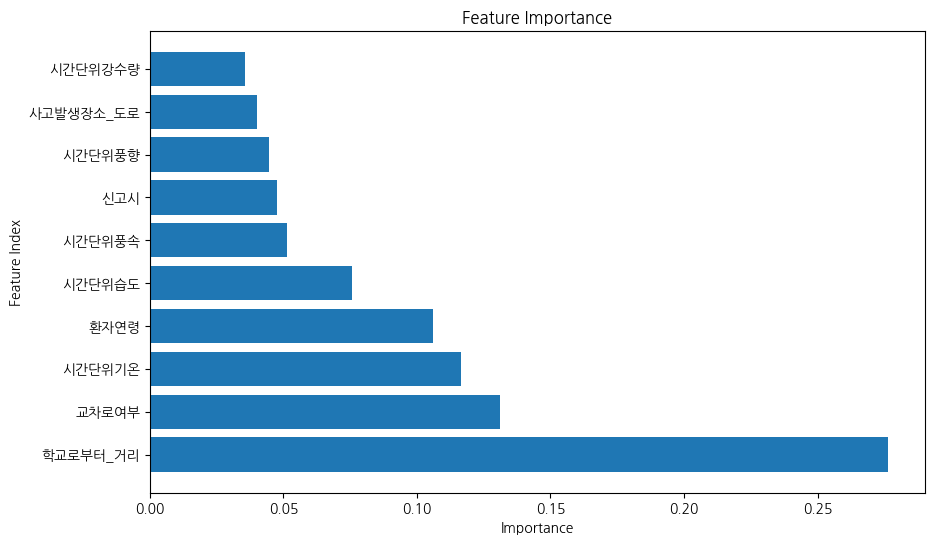

In [54]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("모델 정확도:", accuracy)
print("F1 스코어:", f1)
print('혼동행렬\n',confusion_matrix(y_test, y_pred))

df_features = df.drop(['밀도','밀도비율'],axis=1)
importances = model.feature_importances_

# 변수 중요도 내림차순으로 정렬
indices = (-importances).argsort()

# 상위 10개 변수 추출
top_features = indices[:10]
top_importances = importances[top_features]

# 막대 그래프로 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), df_features.columns[top_features])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance')
plt.show()